<!-- housing feasibility tradeoff anaysis -->

# Housing Feasibility Trade-off Analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#imported required packages 
#load data and copy to manipulate the data
house = pd.read_csv("../data/raw/raw_2.csv")
data = house.copy()



# Data preparing,Feature selection and calculating required metrics

In [3]:
data= data.drop(columns = ["Date","waterfront present","Lattitude","Longitude"])
#drop columns which arent required for anaysis

In [4]:
#create required metric columns for analysis

data["p_inc"] = data["Price"].div(300000).round(2)
data["p_sqft"] = data["Price"].div(data["living area"]).round(2)
# avg income per month is considered as 1.25 L / month (from online sources) and considered 3 L per annum budget for buying house

# data.to_csv("filtered_data")

#  Global Relationship analysis through plotting

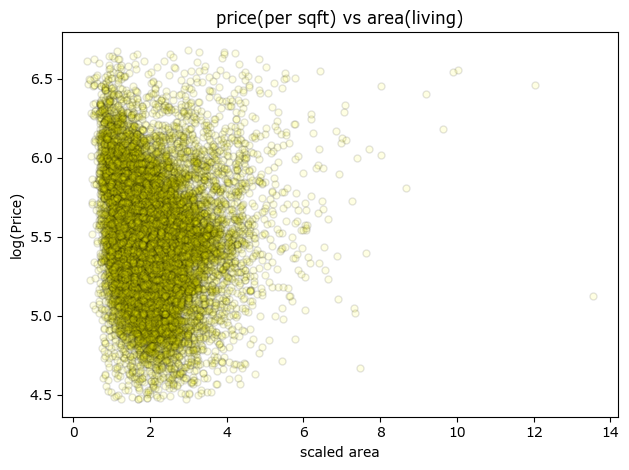

In [5]:
#plotting overall data to analyze relationships with all considered constraints 

plt.figure()
plt.scatter(data["living area"]/1000,np.log(data["p_sqft"]),alpha = 0.11,s= 25,edgecolors = "black",color = "yellow")
plt.xlabel("scaled area")
plt.ylabel("log(Price)")
plt.title("price(per sqft) vs area(living)")
plt.tight_layout()
#plt.savefig("price_area(Total).png")

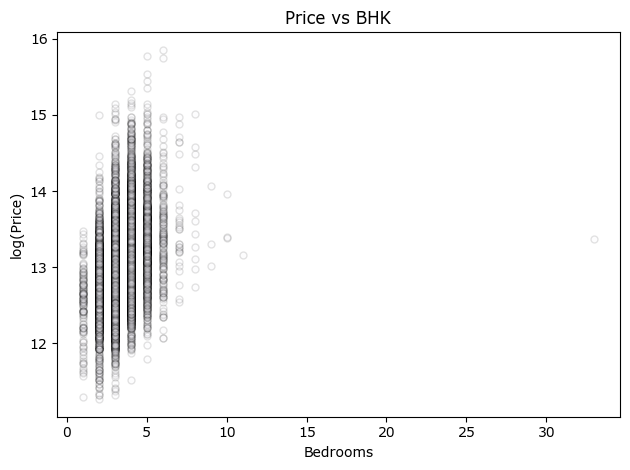

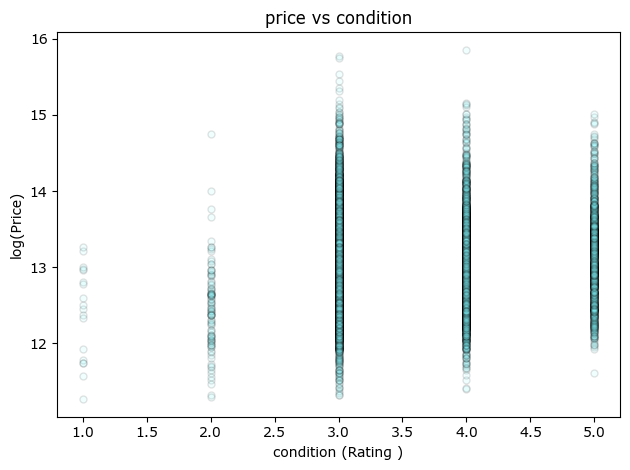

In [6]:
plt.figure()
plt.scatter(data["number of bedrooms"],np.log(data["Price"]),alpha = 0.11,s= 25,edgecolors = "black",color = "#F5F3FA")
plt.xlabel("Bedrooms")
plt.ylabel("log(Price)")
plt.title("Price vs BHK")
plt.tight_layout()
#plt.savefig("price vs BHK.png")
plt.figure()
plt.scatter(data["condition of the house"],np.log(data["Price"]),alpha = 0.11,s= 25,edgecolors = "black",color = "#86F7FC")
plt.xlabel("condition (Rating )")
plt.ylabel("log(Price)")
plt.title("price vs condition")
plt.tight_layout()
#plt.savefig("price vs conditionpng")


# Regional level analysis (using PINCODE)
  > by creating median and mean data for all factors

In [7]:
#created a new dataframe for keen analysis
summary = (
    data.groupby('Postal Code')
      .agg(
          Price_med=('Price', 'median'),
          Area_med=('living area', 'median'),
          BHK_med=('number of bedrooms', 'median'),
          Grade_med=('condition of the house', 'median'),
          Schools_avg=('Number of schools nearby', 'mean'),
          AirportDist_avg=('Distance from the airport', 'mean')
      ).reset_index())
summary
# summary.to_csv("analysis_data")

,Postal Code,Price_med,Area_med,BHK_med,Grade_med,Schools_avg,AirportDist_avg
0,122003,750000.0,1820.0,3.0,3.0,2.131783,65.976744
1,122004,675000.0,1910.0,3.0,3.0,1.974522,64.000000
2,122005,609500.0,2310.0,4.0,3.0,1.983173,65.634615
3,122006,550000.0,1780.0,3.0,3.0,2.027708,65.042821
4,122007,535000.0,1580.0,3.0,3.0,1.982323,63.987374
...,...,...,...,...,...,...,...
65,122068,281508.5,1675.0,3.0,4.0,1.974026,64.201299
66,122069,453000.0,1830.0,3.0,4.0,2.000000,65.146067
67,122070,261000.0,1750.0,3.0,3.0,2.024096,63.927711
68,122071,2100000.0,3990.0,4.0,3.0,2.000000,65.594595


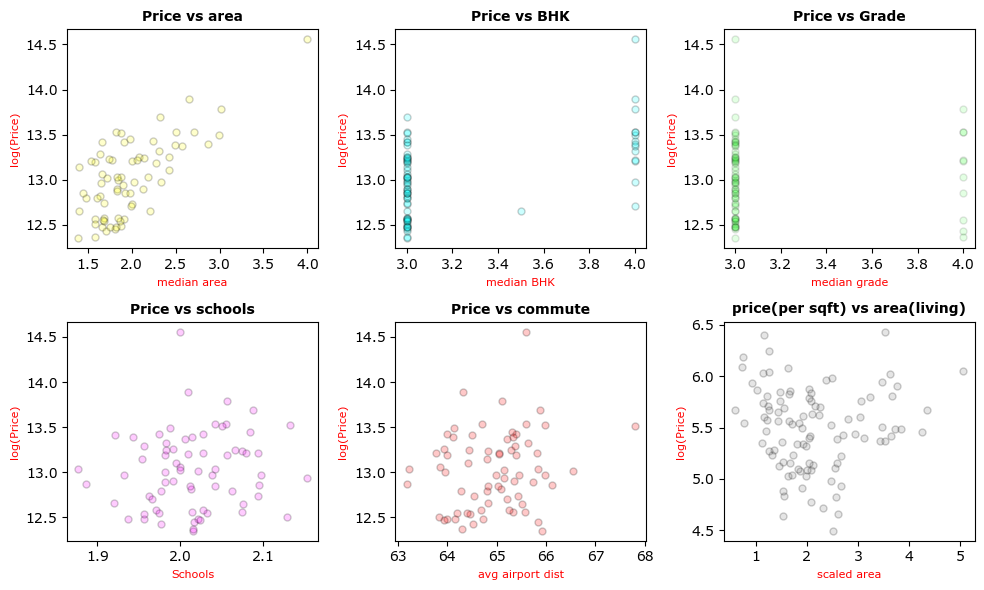

In [8]:
#plotted graphs for keen analysis (considered commute and schools nearby)

fig,axes = plt.subplots(2,3,figsize=(10, 6))
data1 = data.sample(100)

# fill_colors = ["yellow", "cyan", "lime", "magenta", "gold", "lightblue",]
    
    

axes[0,0].scatter(summary["Area_med"]/1000,np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "yellow")
axes[0,0].set_xlabel("median area",color = "red",fontsize=8)
axes[0,0].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,0].set_title("Price vs area",fontsize=10, fontweight='bold')

axes[0,1].scatter(summary["BHK_med"],np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "cyan")
axes[0,1].set_xlabel("median BHK",color = "red",fontsize=8)
axes[0,1].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,1].set_title("Price vs BHK",fontsize=10, fontweight='bold')

axes[0,2].scatter(summary["Grade_med"],np.log(summary["Price_med"]),alpha = 0.11,s= 25,edgecolors = "black",color = "lime")
axes[0,2].set_xlabel("median grade",color = "red",fontsize=8)
axes[0,2].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,2].set_title("Price vs Grade",fontsize=10, fontweight='bold')

axes[1,0].scatter(summary["Schools_avg"],np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "magenta")
axes[1,0].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,0].set_xlabel("Schools",color = "red",fontsize=8)
axes[1,0].set_title("Price vs schools",fontsize=10, fontweight='bold')

axes[1,1].scatter(summary["AirportDist_avg"],np.log(summary["Price_med"]),alpha = 0.21,s= 25,edgecolors = "black",color = "red")
axes[1,1].set_xlabel("avg airport dist",color = "red",fontsize=8)
axes[1,1].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,1].set_title("Price vs commute",fontsize=10, fontweight='bold')

axes[1,2].scatter(data1["living area"]/1000,np.log(data1["p_sqft"]),alpha = 0.20,s= 25,edgecolors = "black",color = "gray")
axes[1,2].set_xlabel("scaled area",color = "red",fontsize=8)
axes[1,2].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,2].set_title("price(per sqft) vs area(living)",fontsize=10, fontweight='bold')


fig.tight_layout()
#fig.savefig("median_analysis_withallconstraints")
plt.show()


In [9]:
# affordibility status for each region

burden_index = data.groupby(data["Postal Code"])["p_inc"].mean().sort_values().reset_index()
burden_index.rename(columns = {"p_inc": "burden_ratio"},inplace = True)
burden_index["status"] = np.where(ratio["burden_ratio"] < 2,"✓","⌀")
# price index = data["p_inc"].value_counts().reset_index().sort_values(by = "p_inc")

summary = pd.merge(summary, burden_index, on="Postal Code", how="left")  # left join
# summary.to_csv("../data/analysis_data/analysis_data.csv", index=False,encoding = "utf-8-sig")



# data[data["p_inc"]<2.5]["Price"].sort_values(ascending = False) 
# ^^ it shows at what amount he must leave comfort/ other constraints or threshold amount where buyer feels burden 

summary.sample(15)

NameError: name 'ratio' is not defined

# TRADE-OFF ANALYSIS

In [10]:
#final data considered for tradeoff interpretetions

tradeoff = summary[summary["Postal Code"].isin([122005,122025,122071,122068,122053,122056])][:].reset_index()
tradeoff
# summary.rename(columns = {"status":"affordability_status"} ,inplace = True)
#  summary.to_csv("../data/analysis_data/analysis_data.csv", index=False,encoding = "utf-8-sig")
#  summary

,index,Postal Code,Price_med,Area_med,BHK_med,Grade_med,Schools_avg,AirportDist_avg
0,2,122005,609500.0,2310.0,4.0,3.0,1.983173,65.634615
1,22,122025,397000.0,1830.0,3.0,3.0,1.981818,65.739394
2,50,122053,380000.0,1980.0,3.0,4.0,2.041509,64.822642
3,53,122056,230750.0,1395.0,3.0,3.0,2.015957,65.925532
4,65,122068,281508.5,1675.0,3.0,4.0,1.974026,64.201299
5,68,122071,2100000.0,3990.0,4.0,3.0,2.000000,65.594595


# Tradeoff observation :

from above analysis , let us consider various regions to interperet final observations
PIN 122005 :
    if Buyer prefer > Large BHK confgurations , Better Commute accessibility
    * trade-offs    > poor school accessibility , Average house condition , Reduced affordibility
PIN 122025 :
    if Buyer prefer > To spend Low budget
    * trade-offs    >  poor house condition ,small area ,limited school accessibilty
PIN 122053 :
    if Buyer prefer > good school accessibility,good condition, with Low budget
    * trade-offs    > poor commute/ airport accessibility
PIN 122056 :
    if Buyer prefer > Strong school accessibilty ,Good airport accessibiltiy
    Has trade-offs  > Low grade and average condition of the house
PIN 122068 :
    if Buyer prefer >good grade and condition of the house , spending low budget
    Has trade-offs  > Small Area, No school accessibility ,poor house condition ,less affordibility
PIN 122071 :
    if Buyer prefer > luxury and quality with all accessibility 
    Has trade-offs  > high budget (upto 2cr)

# Key Insight

There is no single pincode that optimizes all factors.
Each region represents a distinct trade-off between:

>Budget
>Area
>Accessibility (schools, airport, commute)
> Housing quality
This states the idea that real estate decisions are multi-dimensional and depend heavily on buyer priorities.
    
    

# CONCLUSION :

Housing affordability is multi-factor dependent
This project demonstrates that affordability depends on trade-offs, not just price alone.
